In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"
using CSV, DataFrames
using StatsBase
using StatsPlots
theme(:default, grid=false, label="")

In [2]:
rdir = projectdir("_research", "motility_OD_measures")
pdir = plotsdir("motility_OD600") |> mkpath

"/Users/ben/projects/Doran_etal_2022/plots/motility_OD600"

In [3]:
earlydf = CSV.read(joinpath(rdir, "earlygrowth_OD600.tsv"), DataFrame, delim="\t") |>
    df -> stack(df, 2:5) |>
    df -> rename(df, :variable => :time, :value => :OD600);

In [4]:
earlydf = earlydf |>
    df -> transform(df,
        :ID => (x->join.(first.(split.(x, "."), 2), ".")) => :msk_id,
        :ID => (x->last.(split.(x, "."))) => :replicate,
    );

In [5]:
earlypltdf = earlydf |>
    df->groupby(df, [:time, :msk_id]) |>
    df->combine(df, 
        :OD600 => mean,
        :OD600 => std,
    );

In [6]:
cmap = Dict(k => v  for (k, v) in zip(sort(unique(earlydf.msk_id)), palette(:glasbey_bw_n256)))

Dict{String, RGB{Float64}} with 7 entries:
  "neg"   => RGB{Float64}(0.423529,0.0,0.309804)
  "22.92" => RGB{Float64}(0.0,0.67451,0.780392)
  "9.15"  => RGB{Float64}(1.0,0.498039,0.819608)
  "16.22" => RGB{Float64}(0.843137,0.0,0.0)
  "17.70" => RGB{Float64}(0.54902,0.235294,1.0)
  "17.78" => RGB{Float64}(0.007843,0.533333,0.0)
  "9.13"  => RGB{Float64}(0.596078,1.0,0.0)

In [7]:
cmap=Dict(
    "neg" => :grey,
    "9.13" => "#c07b7b",
    "9.15" => "#f7afaf",
    "16.22" => "#ebb041",
    "17.70" => "#15e871",
    "17.78" => "#66e39d",
    "22.92" => "#03893e"
)

Dict{String, Any} with 7 entries:
  "neg"   => :grey
  "9.15"  => "#f7afaf"
  "22.92" => "#03893e"
  "16.22" => "#ebb041"
  "17.70" => "#15e871"
  "17.78" => "#66e39d"
  "9.13"  => "#c07b7b"

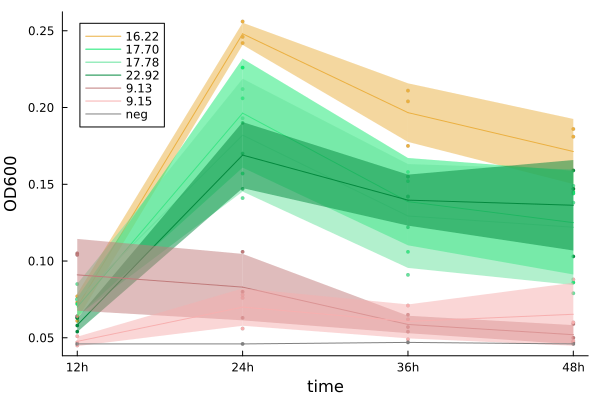

In [8]:
plot(xlabel="time", ylabel="OD600")
@df earlydf scatter!(
    :time, :OD600,
    group=:ID, 
    c=[cmap[id] for id in :msk_id],
    label="", markersize=2, markerstrokewidth=0,
)
@df earlypltdf plot!(
    :time, :OD600_mean,
    group=:msk_id, ribbon=:OD600_std,
    legend=:topleft,
    c=[cmap[id] for id in :msk_id],
)


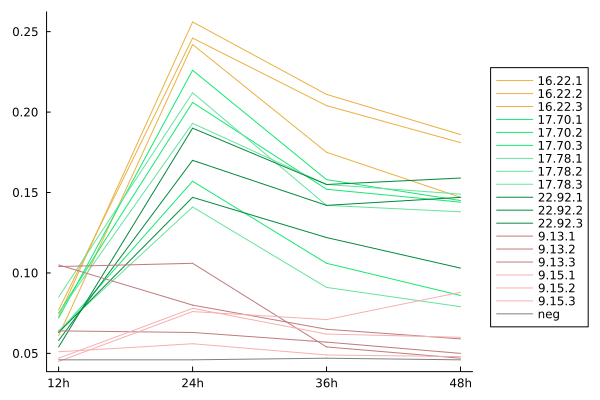

In [9]:
@df earlydf plot(
    :time, :OD600,
    group=:ID, 
    c=[cmap[id] for id in :msk_id],
    legend=:outerright,
)

In [10]:
vortexdf = CSV.read(joinpath(rdir, "postvortex_OD600.tsv"), DataFrame, delim="\t") |>
    df -> stack(df, 2:8) |>
    df -> rename(df, :variable => :time, :value => :OD600);
vortexdf = vortexdf |>
    df -> transform(df,
        :ID => (x->join.(first.(split.(x, "."), 2), ".")) => :msk_id,
        :ID => (x->last.(split.(x, "."))) => :replicate,
    );
vortexpltdf = vortexdf |>
    df->groupby(df, [:time, :msk_id]) |>
    df->combine(df, 
        :OD600 => mean,
        :OD600 => std,
    );

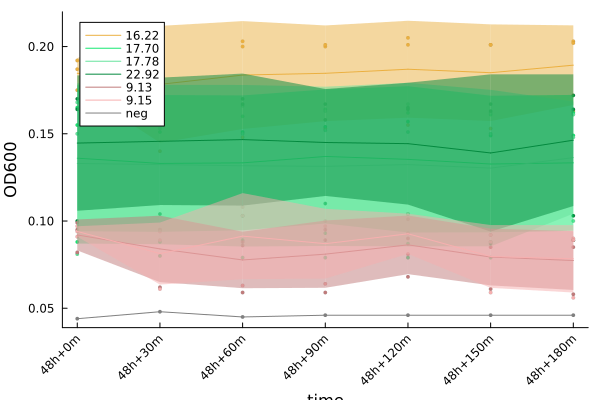

In [11]:
plot(xlabel="time", ylabel="OD600", xrotation=45,)
@df vortexdf scatter!(
    :time, :OD600,
    group=:ID, 
    c=[cmap[id] for id in :msk_id],
    label="", markersize=2, markerstrokewidth=0,
)
@df vortexpltdf plot!(
    :time, :OD600_mean,
    group=:msk_id, ribbon=:OD600_std,
    legend=:topleft,
    c=[cmap[id] for id in :msk_id],
)


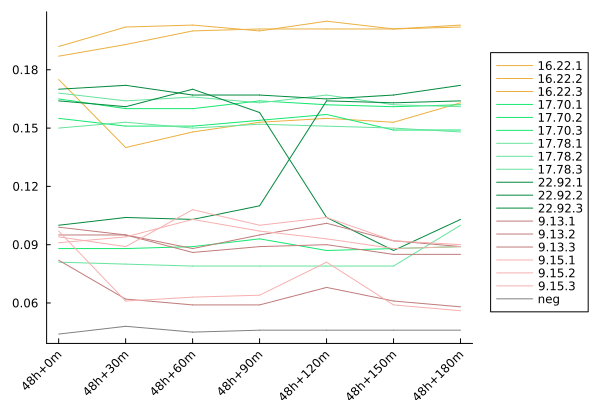

In [12]:
@df vortexdf plot(
    :time, :OD600,
    group=:ID, 
    c=[cmap[id] for id in :msk_id],
    legend=:outerright,
    xrotation=45,
)

In [53]:
fulldf = vcat(earlydf, vortexdf)
# fulldf = filter(:msk_id => x->startswith(x, r"(9|17|22|neg)"), fulldf)
fullpltdf = fulldf |>
    df->groupby(df, [:time, :msk_id]) |>
    df->combine(df, 
        :OD600 => mean,
        :OD600 => std,
    );
fullpltdf.OD600_std .= replace(fullpltdf.OD600_std, NaN => 0.); # set correct std for single negative control

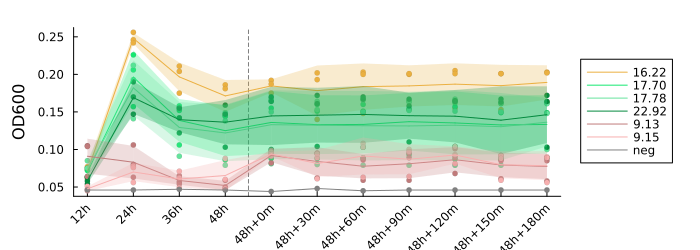

In [74]:
plot(
    # xlabel="time", 
    ylabel="OD600",
    legend=:outerright,
    # legend=:none,
    # legendcolumns=4,
    xrotation=45,
    margin=5Plots.Measures.mm,
    size=(700,250),
    )
@df fulldf scatter!(
    :time, :OD600,
    group=:ID, 
    c=[cmap[id] for id in :msk_id],
    label="", markersize=3, markerstrokewidth=0,
)
vline!([4], c=:black, lw=.5, linestyle=:dash)
@df fullpltdf plot!(
    :time, :OD600_mean,
    group=:msk_id, ribbon=:OD600_std,
    c=[cmap[id] for id in :msk_id],
    fillalpha=.25,
)


In [75]:
savefig(joinpath(pdir, "full_OD600_timeseriesplot.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/motility_OD600/full_OD600_timeseriesplot.pdf"

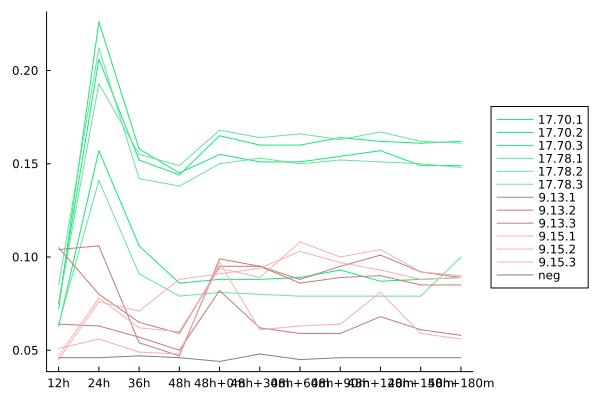

In [19]:
@df fulldf plot(
    :time, :OD600,
    group=:ID, 
    c=[cmap[id] for id in :msk_id],
    legend=:outerright,
)

UndefVarError: UndefVarError: `biobank` not defined